# Prognoosime inimese sugu pikkuse ja kaalu põhjal **Logistilise Regressiooni** abil

In [16]:
'''# Failide uploadimine
from google.colab import files
uploaded = files.upload()
'''

'# Failide uploadimine\nfrom google.colab import files\nuploaded = files.upload()\n'

In [17]:
import os
# Loetleb kõik failid ja kaustad /content kataloogis
print(os.listdir('/content'))

['.config', 'heights_weights.csv', 'sample_data']


In [18]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
import pandas as pd

# CSV faili lugemine, kus eraldajaks on semikoolon
df = pd.read_csv('heights_weights.csv', sep=',', encoding='ISO-8859-1')

# Kuvame esimesed read
print(df.head())

      Height      Weight  Male
0  73.847017  241.893563     1
1  68.781904  162.310473     1
2  74.110105  212.740856     1
3  71.730978  220.042470     1
4  69.881796  206.349801     1


In [20]:
# Samm 2: Teisenda pikkus tollidest sentimeetriteks ja kaal naeltest kilogrammideks
df['Height'] = df['Height'] * 2.54
df['Weight'] = df['Weight'] * 0.4536
print(df.shape)
df.head()

(10000, 3)


,Height,Weight,Male
0,187.571423,109.722920,1
1,174.706036,73.624030,1
2,188.239668,96.499252,1
3,182.196685,99.811265,1
4,177.499761,93.600270,1


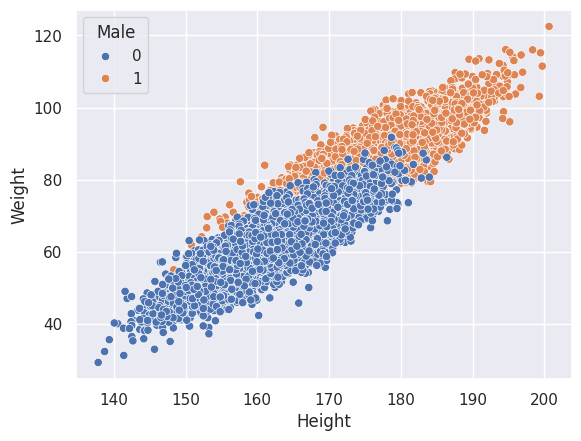

In [21]:
# Plotting our data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Height", y="Weight", hue="Male", data=df)

In [22]:
# Samm 3: Andmete ettevalmistamine
# Eralda omadused (X) ja sihiks (Y)
X = df[['Height', 'Weight']]
Y = df['Male']

In [23]:
# Jaga andmed treening- ja testkomplektideks
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# Standardiseerime andmed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Samm 4: Treeni logistilise regressiooni mudel
clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = clf.fit(X_train, Y_train)

In [26]:
# Samm 5: Prognoosimine ja tõenäosuse arvutamine
def predict_gender_and_probability(height_cm, weight_kg):
    # Standardiseeri sisendandmed
    scaled_input = scaler.transform([[height_cm, weight_kg]])

    # Prognoosi andmine
    prediction = fitted_model.predict(scaled_input)

    # Tõenäosuse arvutamine
    probability = fitted_model.predict_proba(scaled_input)[0]

    return prediction[0], probability

In [27]:
# Näide prognoosist ja tõenäosusest
height_cm = 175  # Kõrgus sentimeetrites
weight_kg = 70   # Kaal kilogrammides
predicted_gender, probability = predict_gender_and_probability(height_cm, weight_kg)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
# Kuvame tulemused
result = "Male" if predicted_gender == 1 else "Female"
print(f"Person is {result} with probability:")
print(f"Probability of being Male: {probability[1]:.2f}")
print(f"Probability of being Female: {probability[0]:.2f}")

Person is Female with probability:
Probability of being Male: 0.07
Probability of being Female: 0.93
